# Epistolary

In [1]:
import sys; sys.path.insert(0,'/Users/ryan/github/lltk')
from epistolary import *

In [4]:
Chad = Corpus('chadwyck')
Chad.meta

,author,title,year,idref,pub,type,name,nation,medium,subcorpus,fn_raw,_addr
id,,,,,,,,,,,,
Eighteenth-Century_Fiction/paltock.01,"Paltock, Robert, 1697-1767",Peter Wilkins (1751),1751,Z200043982,"Printed for J. Robinson, ... and R. Dodsley, [...",BOOK,Vol. 1,British,Fiction,Eighteenth-Century_Fiction,Eighteenth-Century_Fiction/paltock.01.new,_chadwyck/Eighteenth-Century_Fiction/paltock.01
Eighteenth-Century_Fiction/brookefm.02,"Brooke, Frances, 1724?-1789",Lady Julia Mandeville (1763),1763,Z200000703,Printed for R. and J. Dodsley [etc.],BOOK,Vol. 1,British,Fiction,Eighteenth-Century_Fiction,Eighteenth-Century_Fiction/brookefm.02.new,_chadwyck/Eighteenth-Century_Fiction/brookefm.02
Eighteenth-Century_Fiction/mackenzi.01,"Mackenzie, Henry, 1745-1831",Julia de Roubign&eacute; (1777),1777,Z200030400,"Printed for W. Strahan, and T. Cadell",BOOK,Vol. 1,British,Fiction,Eighteenth-Century_Fiction,Eighteenth-Century_Fiction/mackenzi.01.new,_chadwyck/Eighteenth-Century_Fiction/mackenzi.01
Eighteenth-Century_Fiction/cleland.01,"Cleland, John, 1709-1789",Memoirs of a Woman of Pleasure (1749),1749,Z200000927,Printed for G. Fenton [etc.],BOOK,Vol. 1,British,Fiction,Eighteenth-Century_Fiction,Eighteenth-Century_Fiction/cleland.01.new,_chadwyck/Eighteenth-Century_Fiction/cleland.01
Eighteenth-Century_Fiction/haywood.07,"Haywood, Eliza Fowler, 1693?-1756",The Fortunate Foundlings (1744),1744,Z200029933,Printed and published by T. Gardner [etc.],BOOK,Title Page,British,Fiction,Eighteenth-Century_Fiction,Eighteenth-Century_Fiction/haywood.07.new,_chadwyck/Eighteenth-Century_Fiction/haywood.07
...,...,...,...,...,...,...,...,...,...,...,...,...
Early_English_Prose_Fiction/ee54010.01,"Holland, Samuel, gent.",Don Zara Del Fogo (1656),1656,Z200027421,Printed by T. W. for Tho. Vere [etc.],BOOK,Title Page,British,Fiction,Early_English_Prose_Fiction,Early_English_Prose_Fiction/ee54010.01.new,_chadwyck/Early_English_Prose_Fiction/ee54010.01
Early_English_Prose_Fiction/ee17010.04,"Orrery, Roger Boyle, Earl of, 1621-1679","Parthenissa, Part 3 (1655)",1655,Z200025922,Printed for Humphrey Moseley [etc.],BOOK,Title Page,British,Fiction,Early_English_Prose_Fiction,Early_English_Prose_Fiction/ee17010.04.new,_chadwyck/Early_English_Prose_Fiction/ee17010.04
Early_English_Prose_Fiction/ee73020.01,"Oldys, Alexander",The Female Gallant (1692),1692,Z200027810,Printed for Samuel Briscoe [etc.],BOOK,Title Page,British,Fiction,Early_English_Prose_Fiction,Early_English_Prose_Fiction/ee73020.01.new,_chadwyck/Early_English_Prose_Fiction/ee73020.01


In [5]:
# # which texts have letters?
# dfcount = pd.DataFrame(
#     dict(id=t.id, count_letter=t.xml.lower().count('</letter>'))
#     for t in tqdm(Chad.texts())
# )

In [7]:
def num_letters(addr): return Text(addr).xml.lower().count('</letter>')

In [9]:
dfcount = pd.DataFrame(
    {'_addr':addr, 'num_letters':res}
    for addr, res in zip(
        Chad.meta._addr,
        pmap_iter(num_letters, Chad.meta._addr, num_proc=4)
    )
)

Mapping num_letters() [x4]: 100%|█████████▉| 1336/1337 [00:45<00:00, 29.47it/s]


In [13]:
odf=dfcount.merge(Chad.meta,on='_addr').sort_values('num_letters',ascending=False)
odf.head(25)

,_addr,num_letters,author,title,year,idref,pub,type,name,nation,medium,subcorpus,fn_raw
90,_chadwyck/Eighteenth-Century_Fiction/richards.02,646,"Richardson, Samuel, 1689-1761",Clarissa (3rd ed.) (1751),1751,Z200044604,Printed for S. Richardson: [etc.],BOOK,Vol. 1,British,Fiction,Eighteenth-Century_Fiction,Eighteenth-Century_Fiction/richards.02.new
69,_chadwyck/Eighteenth-Century_Fiction/richards.01,625,"Richardson, Samuel, 1689-1761",Clarissa (1st ed.) (1748),1748,Z200044053,Printed for S. Richardson: [etc.],BOOK,Vol. 1,British,Fiction,Eighteenth-Century_Fiction,Eighteenth-Century_Fiction/richards.01.new
7,_chadwyck/Eighteenth-Century_Fiction/richards.06,405,"Richardson, Samuel, 1689-1761",Sir Charles Grandison (1754),1754,Z200045835,Printed for S. Richardson; And Sold by C. Hitc...,BOOK,Vol. 1,British,Fiction,Eighteenth-Century_Fiction,Eighteenth-Century_Fiction/richards.06.new
27,_chadwyck/Eighteenth-Century_Fiction/brookefm.01,232,"Brooke, Frances, 1724?-1789",Emily Montague (1769),1769,Z200000460,"Printed for J. Dodsley, [etc.]",BOOK,Vol. 1,British,Fiction,Eighteenth-Century_Fiction,Eighteenth-Century_Fiction/brookefm.01.new
54,_chadwyck/Eighteenth-Century_Fiction/richards.05,195,"Richardson, Samuel, 1689-1761",Pamela (1742),1742,Z200045598,Printed for S. Richardson; And Sold by J. Osbo...,BOOK,Vol. 1,British,Fiction,Eighteenth-Century_Fiction,Eighteenth-Century_Fiction/richards.05.new
31,_chadwyck/Eighteenth-Century_Fiction/richards.04,194,"Richardson, Samuel, 1689-1761",Pamela (1741),1741,Z200045357,"Printed for C. Rivington, in St. Paul's Church...",BOOK,Vol. 1,British,Fiction,Eighteenth-Century_Fiction,Eighteenth-Century_Fiction/richards.04.new
49,_chadwyck/Eighteenth-Century_Fiction/richards.03,173,"Richardson, Samuel, 1689-1761",Familiar Letters (1750),1750,Z200045177,"Printed for J. Osborn, ... J. and J. Rivington...",BOOK,Title Page,British,Fiction,Eighteenth-Century_Fiction,Eighteenth-Century_Fiction/richards.03.new
1242,_chadwyck/Early_English_Prose_Fiction/ee41010.01,132,"Gildon, Charles, 1665-1724",The Post&hyphen;boy rob'd of his Mail (1692),1692,Z200026790,Printed for John Dunton [etc.],BOOK,Title Page,British,Fiction,Early_English_Prose_Fiction,Early_English_Prose_Fiction/ee41010.01.new
24,_chadwyck/Eighteenth-Century_Fiction/burney.01,91,"Burney, Fanny, 1752-1840",Evelina (1778),1778,Z200000830,"Printed for T. Lowndes, [etc.]",BOOK,Vol. 1,British,Fiction,Eighteenth-Century_Fiction,Eighteenth-Century_Fiction/burney.01.new
1,_chadwyck/Eighteenth-Century_Fiction/brookefm.02,88,"Brooke, Frances, 1724?-1789",Lady Julia Mandeville (1763),1763,Z200000703,Printed for R. and J. Dodsley [etc.],BOOK,Vol. 1,British,Fiction,Eighteenth-Century_Fiction,Eighteenth-Century_Fiction/brookefm.02.new


In [12]:
dfcount.sort_values('num_letters',ascending=False).head(10)

,addr,num_letters
90,_chadwyck/Eighteenth-Century_Fiction/richards.02,646
69,_chadwyck/Eighteenth-Century_Fiction/richards.01,625
7,_chadwyck/Eighteenth-Century_Fiction/richards.06,405
27,_chadwyck/Eighteenth-Century_Fiction/brookefm.01,232
54,_chadwyck/Eighteenth-Century_Fiction/richards.05,195
31,_chadwyck/Eighteenth-Century_Fiction/richards.04,194
49,_chadwyck/Eighteenth-Century_Fiction/richards.03,173
1242,_chadwyck/Early_English_Prose_Fiction/ee41010.01,132
24,_chadwyck/Eighteenth-Century_Fiction/burney.01,91
1,_chadwyck/Eighteenth-Century_Fiction/brookefm.02,88


In [3]:
C=Corpus('epistolary')
C.meta

[14:13:33] lltk.corpus.corpus.init():251: Initializing from metadata: [Epistolary](epistolary)
[14:13:33] lltk.corpus.corpus.init():251: Initializing from metadata: [Chadwyck](chadwyck)
Iterating over texts: 100%|██████████| 2/2 [00:00<00:00, 3521.67it/s]


,author,title,year,idref,pub,type,name,nation,medium,subcorpus,fn_raw
id,,,,,,,,,,,
_chadwyck/Eighteenth-Century_Fiction/burney.01,"Burney, Fanny, 1752-1840",Evelina (1778),1778,Z200000830,"Printed for T. Lowndes, [etc.]",BOOK,Vol. 1,British,Fiction,Eighteenth-Century_Fiction,Eighteenth-Century_Fiction/burney.01.new
_chadwyck/Eighteenth-Century_Fiction/richards.01,"Richardson, Samuel, 1689-1761",Clarissa (1st ed.) (1748),1748,Z200044053,Printed for S. Richardson: [etc.],BOOK,Vol. 1,British,Fiction,Eighteenth-Century_Fiction,Eighteenth-Century_Fiction/richards.01.new


In [4]:
pamela = C.init_text(Chad.au.Richardson.Pamela1741)
clarissa = C.init_text(Chad.au.Richardson.Clarissa1StEd1748)
evelina = C.init_text(Chad.au.Burney.Evelina1778)

Iterating over texts: 100%|██████████| 1337/1337 [00:00<00:00, 2079267.50it/s]


In [5]:
def characters(
        self,df=None,col_sender='sender_tok',col_recip='recip_tok',
        force=False,force_inner=False,verbose=True,*x,**y):
    
    ofn_tok2id = os.path.join(self.path, 'character_names.csv')
    ofn_id2meta = os.path.join(self.path, 'character_feats.csv')

    if force or not os.path.exists(ofn_tok2id):
        if df is None: df=self.meta
        if type(df)!=pd.DataFrame: return pd.DataFrame()
        odf_tok2id=calculate_tok2id(df.fillna(''))
        save_df(odf_tok2id, ofn_tok2id, verbose=verbose, index=False)

    odf_tok2id_anno=merge_read_dfs_anno(ofn_tok2id, on='char_id')

    ## id2meta
    if force or not os.path.exists(ofn_id2meta):
        char_ids = Counter()
        for char_id,char_tok_count in zip(odf_tok2id_anno.index, odf_tok2id_anno.char_tok_count):
            try:
                char_ids[char_id]+=float(char_tok_count)
            except ValueError:
                pass
        # init?
        id2meta_l=[]
        for char_id,char_id_count in char_ids.most_common():
            char_dx={'char_id':char_id, 'char_id_count':char_id_count, **chardata_metakeys_initial}
            id2meta_l.append(char_dx)
        odf_id2meta = pd.DataFrame(id2meta_l).fillna('')
        save_df(odf_id2meta, ofn_id2meta, verbose=verbose, index=False)
        
    odf_id2meta_anno=merge_read_dfs_anno(ofn_id2meta, on='char_id')

    return odf_tok2id_anno.fillna(''), odf_id2meta_anno.fillna('')


In [9]:
df1,df2=characters(clarissa.letters)

[14:13:54] lltk.text.utils.merge_read_dfs_iter():83: Overwriting dataframe with data from: /Users/ryan/lltk_data/corpora/epistolary/texts/_chadwyck/Eighteenth-Century_Fiction/richards.01/letters/character_feats.anno.csv


In [10]:
df2

,char_id_count,char_gender
char_id,,
MissClarissaHarlowe,224,F
MissHowe,183,F
JohnBelford,153,M
MrBelford,72,M
RobertLovelace,70,M
...,...,...
Alex,1,
WmMorden,1,
RoeertLovelace,1,


In [19]:
df2

,char_id_count
char_id,
MissClarissaHarlowe,224.0
MissHowe,183.0
JohnBelford,153.0
MrBelford,72.0
RobertLovelace,70.0
...,...
Alex,1.0
WmMorden,1.0
RoeertLovelace,1.0


In [14]:
clarissa.letters.path

'/Users/ryan/lltk_data/corpora/epistolary/texts/_chadwyck/Eighteenth-Century_Fiction/richards.01/letters'

In [8]:
clarissa.letters.meta

[14:09:08] lltk.corpus.corpus.init():251: Initializing from metadata: [SectionCorpusLetterChadwyck](letters)
[14:09:08] lltk.text.utils.merge_read_dfs_iter():83: Overwriting dataframe with data from: /Users/ryan/lltk_data/corpora/epistolary/texts/_chadwyck/Eighteenth-Century_Fiction/richards.01/letters/metadata.anno.xlsx
Iterating over texts: 100%|██████████| 625/625 [00:00<00:00, 998643.81it/s]


,id_orig,vol_i,letter_i,letter_ii,num_enclosed,depth_enclosed,txt_head,txt_front,txt_start,txt_end,sender_tok,recip_tok,date_ner,date_time,date,num_words,id_parent,place,notes,place_ner
id,,,,,,,,,,,,,,,,,,,,
L001a,Z300044056,1,1,0,0,0,LETTER I.,"Miss Anna Howe, To Miss Clarissa Harlowe.","Jan. 10. I am extremely concerned, my dearest...","s and directresses: for your mamma, admirably ...",Miss Anna Howe,Miss Clarissa Harlowe,Jan. 10,2022-01-10 00:00:00,Jan. 10,1073,,,NaN,
L002a,Z300044057,1,2,0,0,0,LETTER II.,"Miss Clarissa Harlowe, To Miss Howe.","Harlowe-Place, Jan. 13. How you oppress me, m...","denial: Yet gave him reason to think, that she...",Miss Clarissa Harlowe,Miss Howe,Jan. 13,2022-01-13 00:00:00,Jan. 13,2129,,Harlowe-Place,NaN,Harlowe-Place
L003a,Z300044058,1,3,0,0,0,LETTER III.,"Miss Clarissa Harlowe, To Miss Howe.","Jan. 13, 14. And thus, as Mr. Lovelace though...",", what a visible Struggle it cost him to chang...",Miss Clarissa Harlowe,Miss Howe,Jan. 13 | 14,2014-01-13 00:00:00,Jan. 13-14,2597,,Harlowe-Place,NaN,
L004a,Z300044059,1,4,0,0,0,LETTER IV.,"Miss Clarissa Harlowe, To Miss Howe.","This, my dear, was the situation Mr. Lovelace ...","ll not be taken as any, since my son James can...",Miss Clarissa Harlowe,Miss Howe,,,,3445,,Harlowe-Place,NaN,Scotland
L005a,Z300044060,1,5,0,0,0,LETTER V.,"Miss Clarissa Harlowe, To Miss Howe.",Jan. 20. I have been hinder'd from prosecutin...,"imes -- Indeed he is not dutiful. -- But, poss...",Miss Clarissa Harlowe,Miss Howe,Jan. 20,2022-01-20 00:00:00,Jan. 20,1044,,Harlowe-Place,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L525b,Z300044595,7,525,1,2,0,LETTER CXI.,"Mr. Lovelace, To John Belford, Esq; | * * | * *","Lintz, Nov. 28. ‚™Ü‚™ÜDec. 9. I am now on my ...","out of my breast with my own hands, were it ca...",Mr. Lovelace,John Belford,Nov. 28 | Dec. 9,None,Nov. 28 | Dec. 9,1844,,Trent,NaN,Trent
L525c,Z300044595,7,525,2,0,1,,,"Munich, Nov. 21. ‚™Ü‚™ÜDec. 2. Sir, Your lett...",s to pursue. But being disappointed in my hop...,?,?,Nov. 21 | Dec. 2 | four days,None,Nov. 21 | Dec. 2 | four days,248,L525b,Munich | Florence,NaN,Munich | Florence
L525d,Z300044595,7,525,3,0,1,,,"Vienna, Nov. 25. ‚™Ü‚™ÜDec. 6. Sir, I have th...","Vienna, Nov. 25. ‚™Ü‚™ÜDec. 6. Sir, I have th...",?,?,Nov. 25 | Dec. 6,None,Nov. 25 | Dec. 6,117,L525b,Vienna,NaN,Vienna


In [21]:
## Letters in Burney's Evelina
evelina.letters.meta

,id_orig,vol_i,letter_i,letter_ii,num_enclosed,depth_enclosed,txt_head,txt_front,txt_start,txt_end,sender_tok,recip_tok,num_words,newcolx,date_ner,date_time,place_ner,id_parent
id,,,,,,,,,,,,,,,,,,
L001a,Z300000836,1,1,0,0,0,LETTER I.,Lady Howard to the Rev. Mr. Villars.,"Howard Grove. Can there, my good Sir, be any ...",er peace and her reputation. Notwithstanding I...,Lady Howard,Mr. Villars,566,?,,,,
L002a,Z300000837,1,2,0,0,0,LETTER II.,Mr. Villars to Lady Howard.,"Berry Hill, Dorsetshire. Your Ladyship did bu...",", I fear my fortitude would have been unequal ...",Mr. Villars,Lady Howard,1470,?,,,Berry Hill | Dorsetshire,
L003a,Z300000838,1,3,0,0,0,LETTER III.,[Written some months after the last.] Lady Ho...,"Howard Grove, March 8. Dear and Rev. Sir, You...",tly their wish to enlarge and enliven their pa...,Lady Howard,Mr. Villars,431,!,some months after the last | March 8,None,,
L004a,Z300000839,1,4,0,0,0,LETTER IV.,Mr. Villars to Lady Howard.,"Berry Hill, March 12. I am grieved, Madam, to...",et I have thought it necessary to let her be h...,Mr. Villars,Lady Howard,891,!,2022-03-12 00:00:00,2022-03-12 00:00:00,,
L005a,Z300000840,1,5,0,0,0,LETTER V.,Mr. Villars to Lady Howard.,"March 18. Dear Madam, This letter will be del...","March 18. Dear Madam, This letter will be del...",Mr. Villars,Lady Howard,124,,2022-03-18 00:00:00,2022-03-18 00:00:00,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L081c,Z300000920,3,81,2,0,1,,To Miss Anville.,I Have this moment received intelligence that ...,e's name. The views which I am now going to a...,?,Miss Anville,478,,,,,L081b
L081d,Z300000920,3,81,3,0,1,,To Sir Clement Willoughby.,"Sir, The letter you have been pleased to addre...","Sir, The letter you have been pleased to addre...",?,Sir Clement Willoughby,92,,,,,L081b
L082a,Z300000921,3,82,0,0,0,LETTER XXI.,Evelina in continuation.,"Clifton, October 13. The time approaches now,...","!"" I could make no reply; indeed I hardly spo...",?,?,5640,,2022-10-13 00:00:00,2022-10-13 00:00:00,Clifton,


In [6]:
def calculate_tok2id(df_text_letters, col_sender='sender_tok', col_recip='recip_tok'):
    tdf=df_text_letters

    # count it
    counts=Counter()
    l=[]
    for key in [col_sender,col_recip]:
        for x in tdf[key].fillna(''):
            if x:
                l+=[x]
    char_toks=Counter(l)
    
    o_text=[]
    for char_tok,char_tok_count in char_toks.most_common():
        if type(char_tok)!= str or not char_tok: continue
        char_id=zeropunc(char_tok)
        otextd=dict(char_tok=char_tok,char_id=char_id,char_tok_count=char_tok_count,char_tok_i=len(o_text)+1)
        o_text.append(otextd)
    odf_tok2id=pd.DataFrame(o_text)
    return odf_tok2id.sort_values(
        ['char_tok_count','char_tok_i'],
        ascending=[False,True]
    )

In [7]:
evelina.letters.path

'/Users/ryan/lltk_data/corpora/epistolary/texts/_chadwyck/Eighteenth-Century_Fiction/burney.01/letters'

In [18]:
df1, df2 = characters(evelina.letters, force=True)

[14:06:06] lltk.text.utils.merge_read_dfs_iter():83: Overwriting dataframe with data from: /Users/ryan/lltk_data/corpora/epistolary/texts/_chadwyck/Eighteenth-Century_Fiction/burney.01/letters/character_names.anno.csv
[14:06:06] lltk.text.utils.merge_read_dfs_iter():83: Overwriting dataframe with data from: /Users/ryan/lltk_data/corpora/epistolary/texts/_chadwyck/Eighteenth-Century_Fiction/burney.01/letters/character_feats.anno.csv


Saved: /Users/ryan/lltk_data/corpora/epistolary/texts/_chadwyck/Eighteenth-Century_Fiction/burney.01/letters/character_names.csv
Saved: /Users/ryan/lltk_data/corpora/epistolary/texts/_chadwyck/Eighteenth-Century_Fiction/burney.01/letters/character_feats.csv


In [19]:
df1

,char_tok,char_tok_count,char_tok_i
char_id,,,
MrVillars,Mr. Villars,68,1
Evelina,Evelina,61,2
LadyHoward,Lady Howard,12,4
SirJohnBelmont,Sir John Belmont,4,5
MissAnville,Miss Anville,3,6
MrMacartney,Mr. Macartney,2,7
MissMirvan,Miss Mirvan,2,8
LadyBelmont,Lady Belmont,1,9
LordOrville,Lord Orville,1,10


In [20]:
df2

,char_id_count,char_gender
char_id,,
MrVillars,68,M
Evelina,61,F
X!!!,27,?
LadyHoward,12,F
SirJohnBelmont,4,M
MissAnville,3,
MrMacartney,2,
MissMirvan,2,
LadyBelmont,1,


In [35]:
calculate_tok2id(evelina.letters.meta)

,char_tok,char_id,char_tok_count,char_tok_i
0,Mr. Villars,MrVillars,68,1
1,Evelina,Evelina,61,2
2,?,,27,3
3,Lady Howard,LadyHoward,12,4
4,Sir John Belmont,SirJohnBelmont,4,5
5,Miss Anville,MissAnville,3,6
6,Mr. Macartney,MrMacartney,2,7
7,Miss Mirvan,MissMirvan,2,8
8,Lady Belmont,LadyBelmont,1,9
9,Lord Orville,LordOrville,1,10


In [4]:
for g_iter in C.iter_letter_networks(text,progress=True): pass
g_iter.order(), g_iter.size()

Iterating letters as networks: 100%|██████████| 527/527 [00:00<00:00, 40379.95it/s]


(24, 55)

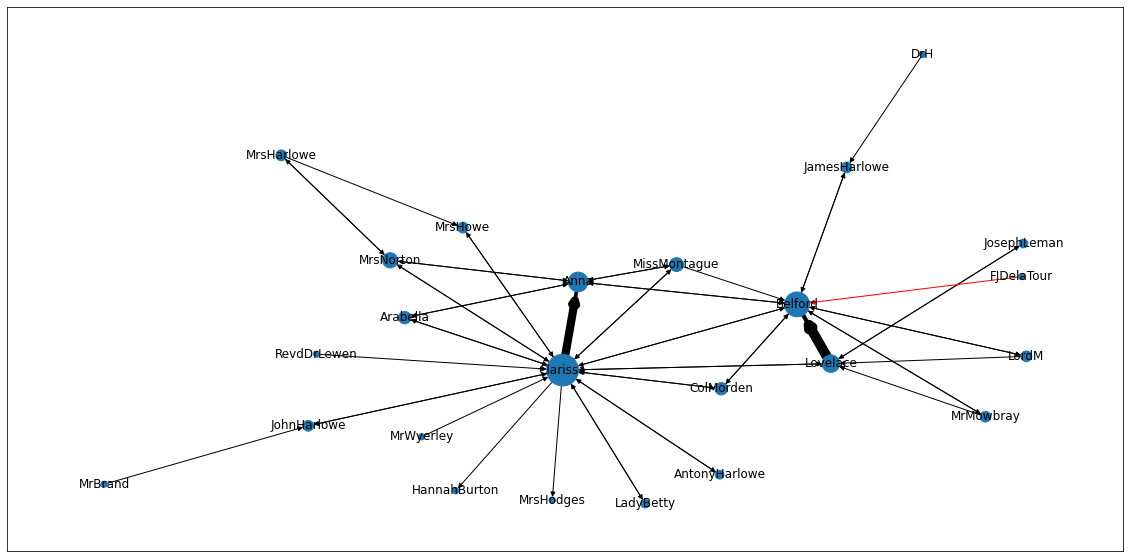

In [5]:
draw_nx(final_g,size_by='degree',show=True)

In [6]:
res = draw_nx_dynamic(
    C.iter_letter_networks(text),
    final_g=C.get_letter_network(text),
    fps=5
)
ofn,htm = res
htm

Iterating letters as networks: 100%|██████████| 527/527 [00:37<00:00, 13.98it/s]


Making movie (fig.dynamic_graph.mp4) [454)]...
